 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [307]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import alpaca_trade_api as tradeapi

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [308]:
csv_path_whale = Path("./Resources/whale_returns.csv")

In [309]:
# Reading whale returns
whale_df = pd.read_csv(csv_path_whale, index_col="Date",infer_datetime_format=True, parse_dates=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [310]:
# Count nulls
whale_df.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [311]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [312]:
# Reading algorithmic returns
csv_path_algo = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(csv_path_algo, index_col="Date",infer_datetime_format=True, parse_dates=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [313]:
# Count nulls
algo_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [314]:
# Drop nulls
algo_df.dropna(inplace=True)

# Print Algo returns
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [315]:
# Reading S&P TSX 60 Closing Prices
csv_path_tsx = Path("./Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(csv_path_tsx, index_col="Date",infer_datetime_format=True, parse_dates=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [316]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [317]:
# Fix Data Types
# cast to string
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype(str)  
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(',','', regex=True).str.replace('$','',regex=True)
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype(float)
print(sp_tsx_df)

               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99
...              ...
2019-12-20  17118.44
2019-12-23  17128.71
2019-12-24  17180.15
2019-12-27  17168.21
2019-12-30  17098.56

[1818 rows x 1 columns]


In [318]:
sp_tsx_df.dtypes

Close    float64
dtype: object

In [319]:
# Calculate Daily Returns
daily_returns_tsx= sp_tsx_df["Close"].pct_change()
print(daily_returns_tsx)

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, Length: 1818, dtype: float64


In [320]:
#Create Additional Column
sp_tsx_df["Returns"] = daily_returns_tsx
sp_tsx_df.head()

,Close,Returns
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305


In [321]:
#Drop "Close" Columns
sp_tsx_df = sp_tsx_df.drop(columns=["Close"])
sp_tsx_df.head()

,Returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [322]:
# Drop nulls
sp_tsx_df.dropna(inplace=True)
sp_tsx_df.head()

,Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [323]:
# Rename `Close` Column to be specific to this portfolio.


In [324]:
#rename column names as a dictionary
sp_tsx_df = sp_tsx_df.rename(columns={'Returns':'SP_TSX'})
sp_tsx_df.head()

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [325]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

allreturns_df = pd.concat([whale_df, sp_tsx_df, algo_df], axis="columns", join="inner")
allreturns_df
#allreturns_df_base for use later...
allreturns_df_base = allreturns_df
allreturns_df_base.index = pd.to_datetime(allreturns_df_base.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')


In [326]:
#drop Nulls
allreturns_df.dropna(inplace=True)
allreturns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_TSX,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.003371,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001344,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,-0.000628,0.000682,-0.007247
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002254,0.002981,0.005256
2019-04-29,0.001254,0.002719,0.006251,0.005223,-0.000788,0.005208,0.002829


In [327]:
#reformat date


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

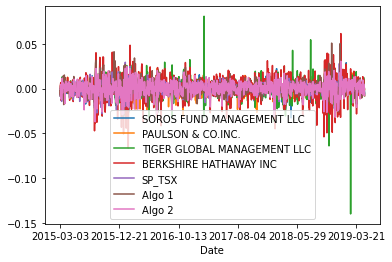

In [328]:
# Plot daily returns of all portfolios
allreturns_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

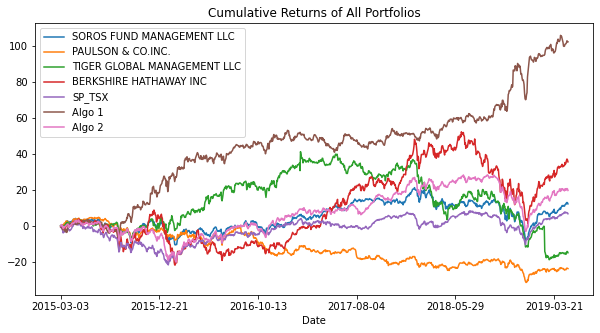

In [329]:
# Calculate cumulative returns of all portfolios
cumulative_returns = ((1 + allreturns_df).cumprod() - 1)*100

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'portfolio Risk'}>

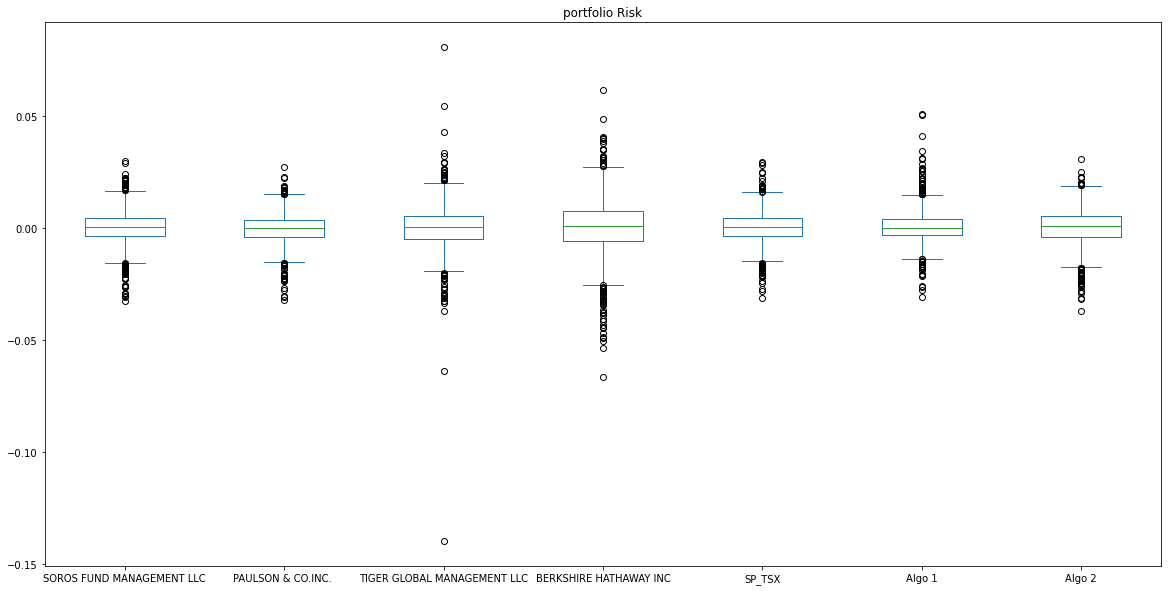

In [330]:
# Box plot to visually show risk
allreturns_df.plot(kind ="box", title="portfolio Risk", figsize = (20,10))


### Calculate Standard Deviations

In [331]:
# Calculate the daily standard deviations of all portfolios
allreturns_std = allreturns_df.std()
allreturns_std.head()
print(allreturns_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
SP_TSX                         0.007034
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64


In [332]:
#Convert series to dataframe
allreturns_std = pd.DataFrame(allreturns_std)

#Name columns
col_names = ["StdDev"]
allreturns_std.columns = col_names
allreturns_std.head()

,StdDev
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
SP_TSX,0.007034


In [333]:
# Determine which portfolio is riskier than the S&P 500

#Convert StdDev to Float
allreturns_std["StdDev"] = allreturns_std["StdDev"].astype(float)
allreturns_std.head()

,StdDev
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
SP_TSX,0.007034


In [334]:
#Find the SP_TSX return
SP_TSX_std = allreturns_std.loc['SP_TSX'][0]
print(SP_TSX_std)

0.007034167748577725


In [335]:
#Compare these values to others
allreturns_std["StdDev"] > SP_TSX_std


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
SP_TSX                         False
Algo 1                          True
Algo 2                          True
Name: StdDev, dtype: bool

In [336]:
# Sort into descending order: 
allreturns_std.sort_values(by='StdDev', ascending=False)

,StdDev
BERKSHIRE HATHAWAY INC,0.012826
TIGER GLOBAL MANAGEMENT LLC,0.010883
Algo 2,0.008326
SOROS FUND MANAGEMENT LLC,0.007828
Algo 1,0.007589
SP_TSX,0.007034
PAULSON & CO.INC.,0.006982


In [337]:
# Calculate  the daily standard deviation of S&P TSX 60
# SEE LINE 25

### Calculate the Annualized Standard Deviation

In [338]:
# Calculate the annualized standard deviation (252 trading days)
allreturns_std_annual = allreturns_std.std() * np.sqrt(252)
allreturns_std_annual

StdDev    0.035259
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

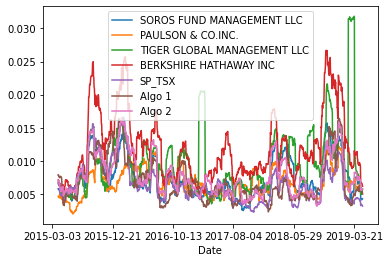

In [339]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
allreturns_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [340]:
# Calculate the correlation
correlation = allreturns_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_TSX,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.673930,0.313795,0.826667
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.486511,0.266363,0.674015
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.440583,0.161236,0.506689
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.557250,0.289378,0.684609
SP_TSX,0.673930,0.486511,0.440583,0.557250,1.000000,0.310276,0.737370
Algo 1,0.313795,0.266363,0.161236,0.289378,0.310276,1.000000,0.285455
Algo 2,0.826667,0.674015,0.506689,0.684609,0.737370,0.285455,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [341]:
# Calculate covariance of a single portfolio.  Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

#CALCULATE for Soros
covariance = correlation['SP_TSX'].cov(correlation['SOROS FUND MANAGEMENT LLC'])
covariance

0.026910114679255637

In [342]:
# Calculate variance of S&P TSX
variance = allreturns_df['SP_TSX'].var()
variance

4.9479515915131015e-05

In [343]:
# Computing beta
S_P_beta = covariance / variance
S_P_beta

543.8637420263528

<AxesSubplot:title={'center':'Rolling 60-Day Beta of George Soros Fund vs SP_TSX 60'}, xlabel='Date'>

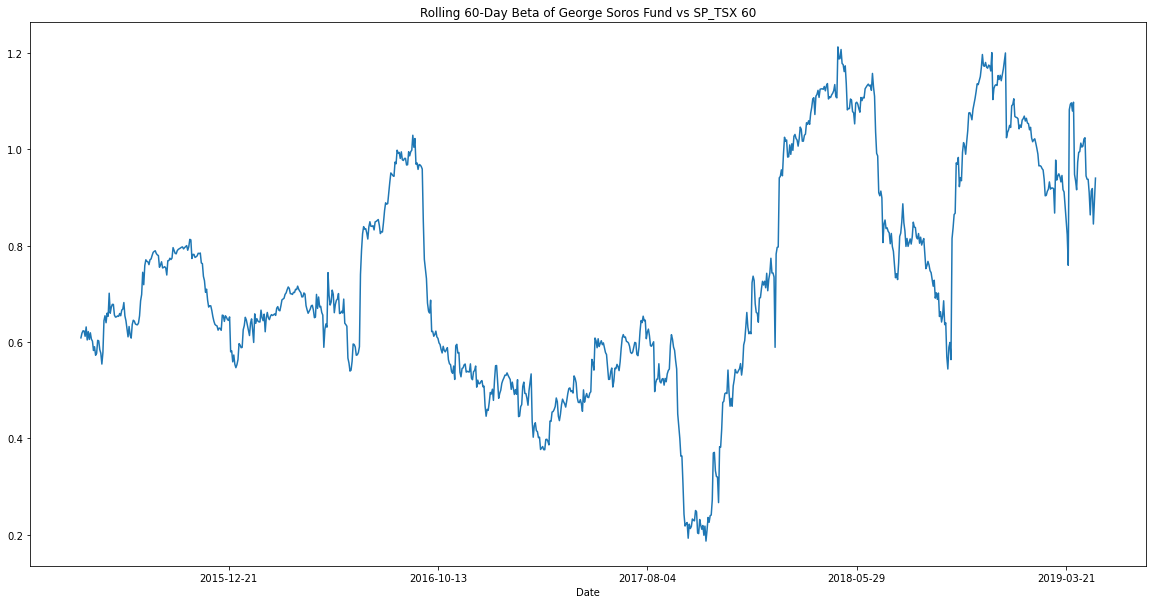

In [344]:
# Plot beta trend of Soros vs. SP_TSX. Since: rolling_beta = rolling_covariance / rolling_variance
rolling_SOROS_covariance = allreturns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(allreturns_df['SP_TSX'])
rolling_TSX_variance = allreturns_df['SP_TSX'].rolling(window=60).var()

rolling_SOROS_beta = rolling_SOROS_covariance / rolling_TSX_variance
rolling_SOROS_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of George Soros Fund vs SP_TSX 60')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 60-Day Beta of George Soros Fund vs SP_TSX 60'}, xlabel='Date'>

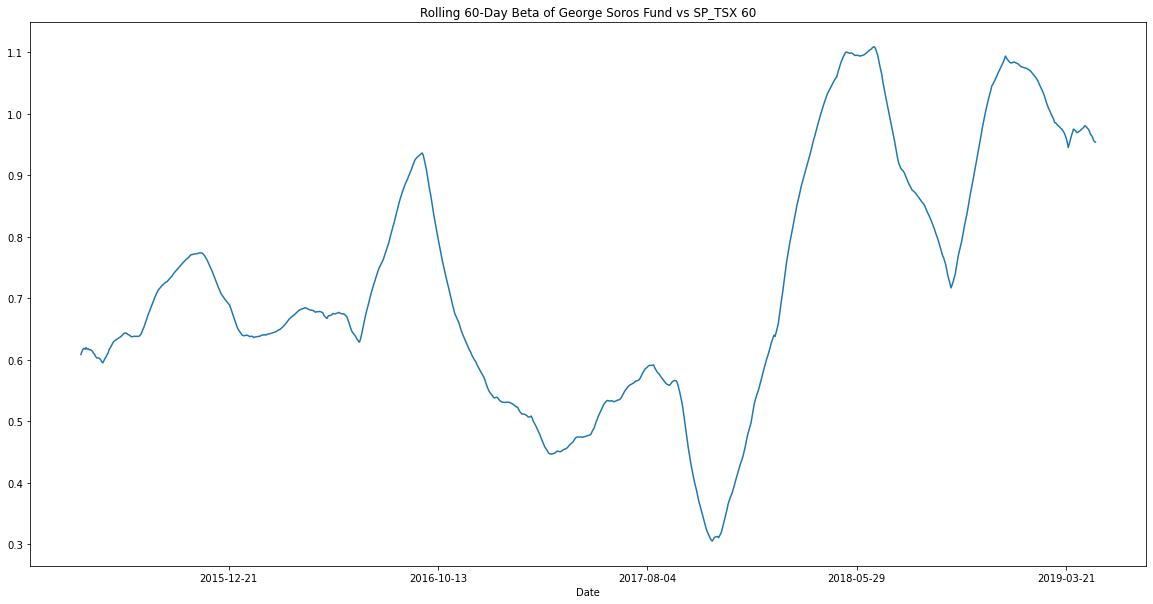

In [345]:
# Use `ewm` to calculate the rolling window
# Assume we are to calculate the EWM of Beta
rolling_SOROS_beta = rolling_SOROS_beta.ewm(com=21).mean()
rolling_SOROS_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of George Soros Fund vs SP_TSX 60')


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [346]:
# Annualized Sharpe Ratios
#allreturns_std
allreturns_df_base
# Calculate std dev
all_portfolio_std_base = allreturns_df_base.std()
all_portfolio_std_base.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
SP_TSX                         0.007034
dtype: float64

In [347]:
# Calculate sharpe ratio
sharpe_ratios = (allreturns_df_base.mean() * 252) / (all_portfolio_std_base * np.sqrt(252))
sharpe_ratios.head()
print(sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
SP_TSX                         0.195550
Algo 1                         1.491514
Algo 2                         0.396817
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

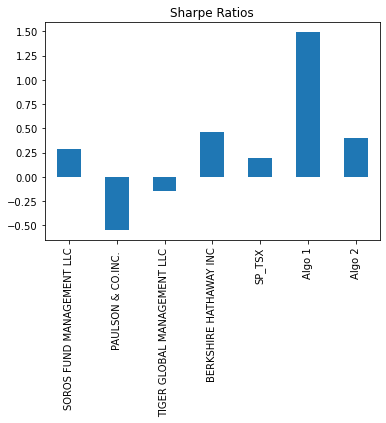

In [348]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")


In [349]:
#Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
"Yes, the algo outperforms the S&P TSX 60"

'Yes, the algo outperforms the S&P TSX 60'

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [350]:
#Look up ["SHOP","TSLA","PFE","ENB","SPY"]
# Reading data from 2nd stock
# Reading data from 3rd stock

In [351]:
portfolio_path = Path("Stocks_Assignment.csv")
portfolio_df = pd.read_csv(portfolio_path, parse_dates=True, infer_datetime_format=True)
portfolio_df.head()

,Unnamed: 0,PFE,Unnamed: 2,TSLA,Unnamed: 4,ENB,Unnamed: 6,SHOP,Unnamed: 8,SPY
0,5/2/2016,31.07,5/2/2016,48.36,5/2/2016,41.33,5/2/2016,31.41,5/2/2016,207.97
1,5/3/2016,31.93,5/3/2016,46.46,5/3/2016,40.42,5/3/2016,30.74,5/3/2016,206.16
2,5/4/2016,31.64,5/4/2016,44.51,5/4/2016,39.57,5/4/2016,29.61,5/4/2016,205.01
3,5/5/2016,31.80,5/5/2016,42.31,5/5/2016,39.10,5/5/2016,28.52,5/5/2016,204.97
4,5/6/2016,31.81,5/6/2016,42.99,5/6/2016,39.29,5/6/2016,27.72,5/6/2016,205.72


In [352]:
# Combine all stocks in a single DataFrame
portfolio_df = portfolio_df.drop(columns=["Unnamed: 2","Unnamed: 4","Unnamed: 6","Unnamed: 8"])
portfolio_df.head()

,Unnamed: 0,PFE,TSLA,ENB,SHOP,SPY
0,5/2/2016,31.07,48.36,41.33,31.41,207.97
1,5/3/2016,31.93,46.46,40.42,30.74,206.16
2,5/4/2016,31.64,44.51,39.57,29.61,205.01
3,5/5/2016,31.80,42.31,39.10,28.52,204.97
4,5/6/2016,31.81,42.99,39.29,27.72,205.72


In [353]:
#portfolio_df = portfolio_df.set_index("Unamed:0")
# Reorganize portfolio data by having a column per symbol
columns = ["Date", "PFE", "TSLA", "ENB", "SHOP", "SPY"]
portfolio_df.columns = columns
portfolio_df.head()


,Date,PFE,TSLA,ENB,SHOP,SPY
0,5/2/2016,31.07,48.36,41.33,31.41,207.97
1,5/3/2016,31.93,46.46,40.42,30.74,206.16
2,5/4/2016,31.64,44.51,39.57,29.61,205.01
3,5/5/2016,31.80,42.31,39.10,28.52,204.97
4,5/6/2016,31.81,42.99,39.29,27.72,205.72


In [354]:
# Reset Date index
portfolio_df.set_index(portfolio_df['Date'], inplace=True)
portfolio_df = portfolio_df.drop(columns=["Date"])
portfolio_df.head()

,PFE,TSLA,ENB,SHOP,SPY
Date,,,,,
5/2/2016,31.07,48.36,41.33,31.41,207.97
5/3/2016,31.93,46.46,40.42,30.74,206.16
5/4/2016,31.64,44.51,39.57,29.61,205.01
5/5/2016,31.80,42.31,39.10,28.52,204.97
5/6/2016,31.81,42.99,39.29,27.72,205.72


In [355]:
# Calculate daily returns
# Drop NAs
# Display sample data
daily_returns = portfolio_df.pct_change()
daily_returns = daily_returns.dropna()
daily_returns.index = pd.to_datetime(daily_returns.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')
daily_returns.head()

,PFE,TSLA,ENB,SHOP,SPY
Date,,,,,
2016-05-03,0.027679,-0.039289,-0.022018,-0.021331,-0.008703
2016-05-04,-0.009082,-0.041972,-0.021029,-0.036760,-0.005578
2016-05-05,0.005057,-0.049427,-0.011878,-0.036812,-0.000195
2016-05-06,0.000314,0.016072,0.004859,-0.028050,0.003659
2016-05-09,0.007230,-0.028146,-0.019598,-0.045455,0.000826


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [356]:
# Set weights
weights =  [0.2, 0.2, 0.2, 0.2, 0.2]
weighted_returns =  weights * daily_returns
weighted_returns

,PFE,TSLA,ENB,SHOP,SPY
Date,,,,,
2016-05-03,0.005536,-0.007858,-0.004404,-0.004266,-0.001741
2016-05-04,-0.001816,-0.008394,-0.004206,-0.007352,-0.001116
2016-05-05,0.001011,-0.009885,-0.002376,-0.007362,-0.000039
2016-05-06,0.000063,0.003214,0.000972,-0.005610,0.000732
2016-05-09,0.001446,-0.005629,-0.003920,-0.009091,0.000165
...,...,...,...,...,...
2018-04-24,0.001434,0.000071,-0.010448,0.000374,-0.002693
2018-04-25,-0.002051,-0.001940,-0.000817,-0.005067,0.000494
2018-04-26,0.000921,0.003420,0.001025,0.006882,0.002033


In [359]:
portfolio_returns = weighted_returns.sum(axis=1)
portfolio_returns

Date
2016-05-03   -0.012732
2016-05-04   -0.022884
2016-05-05   -0.018651
2016-05-06   -0.000629
2016-05-09   -0.017028
                ...   
2018-04-24   -0.011263
2018-04-25   -0.009381
2018-04-26    0.014281
2018-04-27    0.013577
2018-04-30    0.010441
Length: 502, dtype: float64

<AxesSubplot:title={'center':'Cumulative Returns of Portfolio'}, xlabel='Date'>

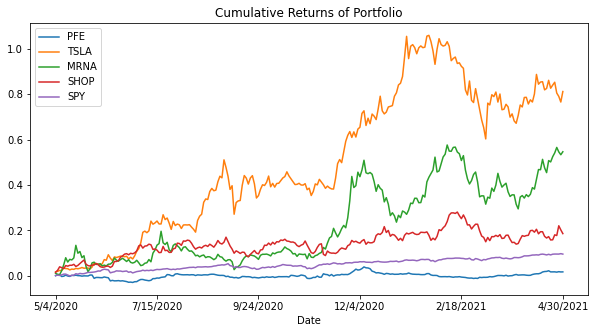

In [360]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns_total.plot(figsize=(10,5), title="Cumulative Returns of Portfolio")
# # Display sample data

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [382]:
# Join your returns DataFrame to the original returns DataFrame
total_df = pd.concat([allreturns_df_base, daily_returns], axis="columns", join="inner")
total_df


pandas.core.frame.DataFrame

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [374]:
# Calculate the annualized `std`
total_df_std = total_df.std()
total_df_std = pd.DataFrame(total_df_std)
total_df_std.head()
col_names = ["StdDev"]
total_df_std.columns = col_names
total_df_std.head()

,StdDev
SOROS FUND MANAGEMENT LLC,0.006710
PAULSON & CO.INC.,0.006981
TIGER GLOBAL MANAGEMENT LLC,0.009550
BERKSHIRE HATHAWAY INC,0.010294
SP_TSX,0.005477


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

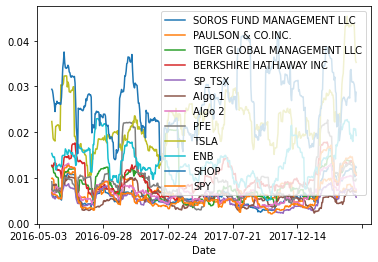

In [376]:
# Calculate rolling standard deviation
total_df.rolling(window=21).std().plot()

# Plot rolling standard deviation
# ax = total_df_std.plot()
# total_df_std.rolling(window=21).mean().plot(ax=ax)

### Calculate and plot the correlation

In [377]:
# Calculate and plot the correlation
#sns.lmplot(x='SP500', y='MSFT', data=daily_returns, aspect=1.5, fit_reg=True)

correlation_all = total_df.corr()
correlation_all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP_TSX,Algo 1,Algo 2,PFE,TSLA,ENB,SHOP,SPY
SOROS FUND MANAGEMENT LLC,1.000000,0.584586,0.498555,0.707891,0.581499,0.234417,0.753653,0.365283,0.330073,0.405449,0.387762,0.763159
PAULSON & CO.INC.,0.584586,1.000000,0.298659,0.474470,0.449862,0.223540,0.631980,0.431658,0.224937,0.318536,0.299090,0.596532
TIGER GLOBAL MANAGEMENT LLC,0.498555,0.298659,1.000000,0.391743,0.363559,0.091112,0.469737,0.301216,0.259246,0.276200,0.155614,0.619621
BERKSHIRE HATHAWAY INC,0.707891,0.474470,0.391743,1.000000,0.509069,0.165866,0.648005,0.326914,0.372238,0.299697,0.459891,0.699019
SP_TSX,0.581499,0.449862,0.363559,0.509069,1.000000,0.267066,0.687594,0.343461,0.260951,0.570282,0.364895,0.683867
Algo 1,0.234417,0.223540,0.091112,0.165866,0.267066,1.000000,0.206058,0.187792,0.083097,0.272488,0.119382,0.234603
Algo 2,0.753653,0.631980,0.469737,0.648005,0.687594,0.206058,1.000000,0.457272,0.336076,0.421852,0.406570,0.849524
PFE,0.365283,0.431658,0.301216,0.326914,0.343461,0.187792,0.457272,1.000000,0.157685,0.148124,0.135361,0.565078
TSLA,0.330073,0.224937,0.259246,0.372238,0.260951,0.083097,0.336076,0.157685,1.000000,0.235903,0.197557,0.354602
ENB,0.405449,0.318536,0.276200,0.299697,0.570282,0.272488,0.421852,0.148124,0.235903,1.000000,0.223732,0.421092


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta of correlation_all / total_df
covariance_all = daily_returns.cov(total_df['SP_TSX'])
covariance

In [ ]:
# Calculate variance of S&P TSX
variance_all = allreturns_df['SP_TSX'].var()
variance_all
# Computing beta
S_P_beta = covariance_all / variance_all
S_P_beta
# Plot beta trend of my portfolio vs. SP_TSX. Since: rolling_beta = rolling_covariance / rolling_variance
rolling_mine_covariance = allreturns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(allreturns_df['SP_TSX'])
rolling_TSX_variance = allreturns_df['SP_TSX'].rolling(window=60).var()

rolling_SOROS_beta = rolling_SOROS_covariance / rolling_TSX_variance
rolling_SOROS_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of George Soros Fund vs SP_TSX 60')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [273]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = (allreturns_df_base.mean() * 252) / (all_portfolio_std_base * np.sqrt(252))
sharpe_ratios.head()
print(sharpe_ratios)

<AxesSubplot:title={'center':'Sharpe Ratios'}>

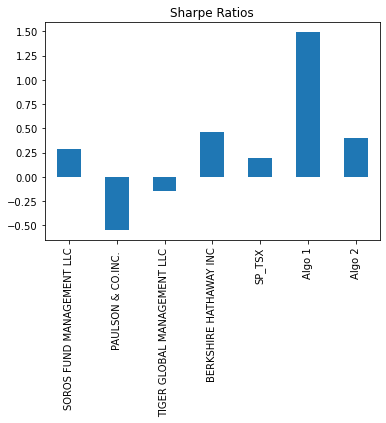

In [385]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [387]:
"My portfolio wins!"

'My portfolio wins!'